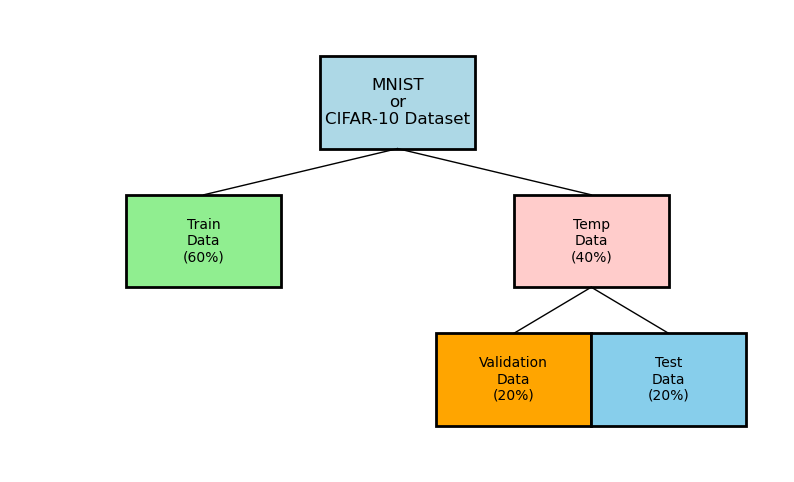

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Adjust text alignment to fit within the boxes
fig, ax = plt.subplots(figsize=(10, 6))

# Add the main rectangle for the dataset with adjusted text alignment
ax.add_patch(Rectangle((0.4, 0.7), 0.2, 0.2, edgecolor='black', facecolor='#add8e6', lw=2))
ax.text(0.5, 0.8, 'MNIST\nor\nCIFAR-10 Dataset', horizontalalignment='center', verticalalignment='center', fontsize=12, wrap=True)

# Add the train-test split rectangle and adjusted text alignment
ax.add_patch(Rectangle((0.15, 0.4), 0.2, 0.2, edgecolor='black', facecolor='#90ee90', lw=2))
ax.text(0.25, 0.5, 'Train\nData\n(60%)', horizontalalignment='center', verticalalignment='center', fontsize=10, wrap=True)
ax.add_patch(Rectangle((0.65, 0.4), 0.2, 0.2, edgecolor='black', facecolor='#ffcccb', lw=2))
ax.text(0.75, 0.5, 'Temp\nData\n(40%)', horizontalalignment='center', verticalalignment='center', fontsize=10, wrap=True)

# Add lines connecting Dataset to Train and Temp Data
ax.plot([0.5, 0.25], [0.7, 0.6], color='black', lw=1)
ax.plot([0.5, 0.75], [0.7, 0.6], color='black', lw=1)

# Add the validation-test split rectangle and adjusted text alignment
ax.add_patch(Rectangle((0.55, 0.1), 0.2, 0.2, edgecolor='black', facecolor='#ffa500', lw=2))
ax.text(0.65, 0.2, 'Validation\nData\n(20%)', horizontalalignment='center', verticalalignment='center', fontsize=10, wrap=True)
ax.add_patch(Rectangle((0.75, 0.1), 0.2, 0.2, edgecolor='black', facecolor='#87ceeb', lw=2))
ax.text(0.85, 0.2, 'Test\nData\n(20%)', horizontalalignment='center', verticalalignment='center', fontsize=10, wrap=True)

# Add lines connecting Temp Data to Validation and Test Data
ax.plot([0.75, 0.65], [0.4, 0.3], color='black', lw=1)
ax.plot([0.75, 0.85], [0.4, 0.3], color='black', lw=1)

# Adjust plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # Hide axes

# Display the updated plot with better fitting text
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve ,confusion_matrix


In [6]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Filter for classes 1 and 7
mask = (y == 1) | (y == 7)
X = X[mask]
y = y[mask]

# Convert labels to binary (-1 for 1 and 1 for 7)
y = np.where(y == 1, -1, 1)

# Normalize the data (scale pixel values between 0 and 1)
X = X / 255.0

# Split the data into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)



Training set size: (9102, 784)
Validation set size: (3034, 784)
Test set size: (3034, 784)


In [7]:
# Define the hyperparameters grid for tuning regularization strength 'C'
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Range of regularization strengths for the model with regularization
}

# Initialize Logistic Regression models
log_reg_with_reg = LogisticRegression(penalty='l2', max_iter=1000, solver='sag')
log_reg_without_reg = LogisticRegression(penalty=None, max_iter=2000, solver='newton-cg')

# Initialize GridSearchCV with 10-fold cross-validation for both models
grid_search_with_reg = GridSearchCV(estimator=log_reg_with_reg, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_without_reg = GridSearchCV(estimator=log_reg_without_reg, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# Train both models using GridSearchCV on the training data
grid_search_with_reg.fit(X_train, y_train)
grid_search_without_reg.fit(X_train, y_train)

# Get the best models from GridSearchCV
best_model_with_reg = grid_search_with_reg.best_estimator_
best_model_without_reg = grid_search_without_reg.best_estimator_

best_C_with_reg = grid_search_with_reg.best_params_['C']
best_C_without_reg = grid_search_without_reg.best_params_['C']

print(f"Best C value for regularization model: {best_C_with_reg}")
print(f"Best C value for no regularization model: {best_C_without_reg}")


/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/asti

Best C value for regularization model: 1
Best C value for no regularization model: 0.001


In [8]:
# Validate the model with regularization on the validation set
val_predictions_with_reg = best_model_with_reg.predict(X_val)
val_accuracy_with_reg = accuracy_score(y_val, val_predictions_with_reg)
roc_auc_with_reg = roc_auc_score(y_val, best_model_with_reg.decision_function(X_val))

print("\nValidation Accuracy (With Regularization):", val_accuracy_with_reg)
print("Validation ROC AUC (With Regularization):", roc_auc_with_reg)

# Validate the model without regularization on the validation set
val_predictions_without_reg = best_model_without_reg.predict(X_val)
val_accuracy_without_reg = accuracy_score(y_val, val_predictions_without_reg)
roc_auc_without_reg = roc_auc_score(y_val, best_model_without_reg.decision_function(X_val))

print("\nValidation Accuracy (Without Regularization):", val_accuracy_without_reg)
print("Validation ROC AUC (Without Regularization):", roc_auc_without_reg)



Validation Accuracy (With Regularization): 0.9950560316413974
Validation ROC AUC (With Regularization): 0.9997949200253411

Validation Accuracy (Without Regularization): 0.994726433750824
Validation ROC AUC (Without Regularization): 0.9997657472900924


In [9]:
# Test the model with regularization on the test set
test_predictions_with_reg = best_model_with_reg.predict(X_test)
test_accuracy_with_reg = accuracy_score(y_test, test_predictions_with_reg)
roc_auc_with_reg = roc_auc_score(y_test, best_model_with_reg.decision_function(X_test))

print("\nTest Accuracy (With Regularization):", test_accuracy_with_reg)
print("Test ROC AUC (With Regularization):", roc_auc_with_reg)

# Test the model without regularization on the test set
test_predictions_without_reg = best_model_without_reg.predict(X_test)
test_accuracy_without_reg = accuracy_score(y_test, test_predictions_without_reg)
roc_auc_without_reg = roc_auc_score(y_test, best_model_without_reg.decision_function(X_test))

print("\nTest Accuracy (Without Regularization):", test_accuracy_without_reg)
print("Test ROC AUC (Without Regularization):", roc_auc_without_reg)



Test Accuracy (With Regularization): 0.994726433750824
Test ROC AUC (With Regularization): 0.9998343551008168

Test Accuracy (Without Regularization): 0.9943968358602505
Test ROC AUC (Without Regularization): 0.9998125597193452


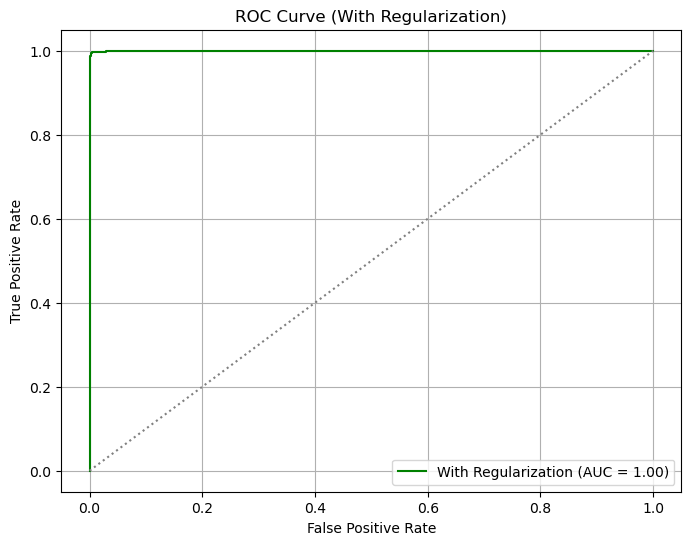

In [10]:
# Plot ROC curve for the model with regularization
fpr_with_reg, tpr_with_reg, _ = roc_curve(y_test, best_model_with_reg.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr_with_reg, tpr_with_reg, label=f"With Regularization (AUC = {roc_auc_with_reg:.2f})", color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.title("ROC Curve (With Regularization)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


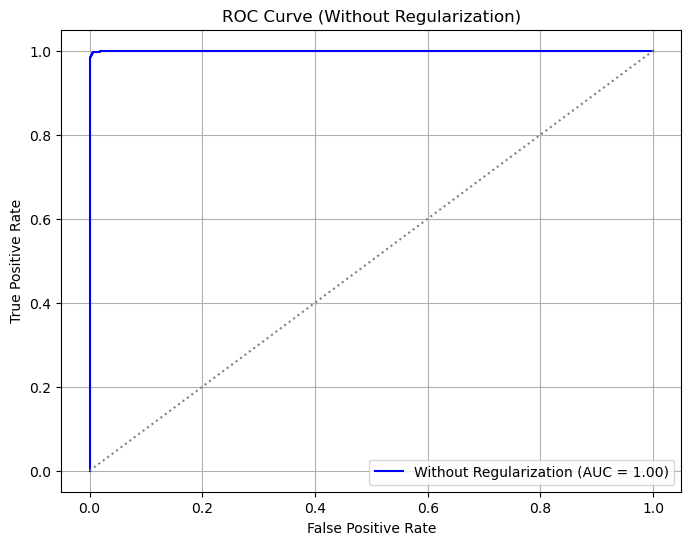

In [11]:
# Plot ROC curve for the model without regularization
fpr_without_reg, tpr_without_reg, _ = roc_curve(y_test, best_model_without_reg.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_reg, tpr_without_reg, label=f"Without Regularization (AUC = {roc_auc_without_reg:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.title("ROC Curve (Without Regularization)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [12]:
# Function to calculate per-class accuracy
def per_class_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[-1, 1])
    accuracy_class_1 = cm[0, 0] / cm[0].sum()  # Accuracy for class -1
    accuracy_class_7 = cm[1, 1] / cm[1].sum()  # Accuracy for class 7
    return accuracy_class_1, accuracy_class_7

# Calculate Per-Class Accuracy for the Model with Regularization
per_class_acc_with_reg = per_class_accuracy(y_test, test_predictions_with_reg)
print(f"Per-Class Accuracy (With Regularization):")
print(f"  - Class -1 (1 in dataset): {per_class_acc_with_reg[0]:.4f}")
print(f"  - Class 7: {per_class_acc_with_reg[1]:.4f}")

# Calculate Per-Class Accuracy for the Model without Regularization
per_class_acc_without_reg = per_class_accuracy(y_test, test_predictions_without_reg)
print(f"\nPer-Class Accuracy (Without Regularization):")
print(f"  - Class -1 (1 in dataset): {per_class_acc_without_reg[0]:.4f}")
print(f"  - Class 7: {per_class_acc_without_reg[1]:.4f}")

Per-Class Accuracy (With Regularization):
  - Class -1 (1 in dataset): 0.9950
  - Class 7: 0.9944

Per-Class Accuracy (Without Regularization):
  - Class -1 (1 in dataset): 0.9944
  - Class 7: 0.9944


/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astiwar1/.co

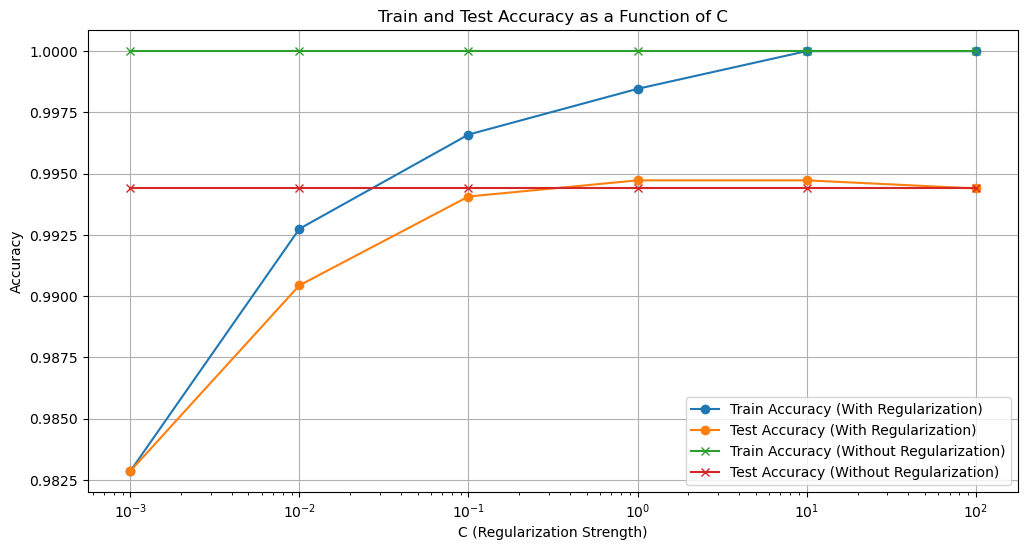

In [13]:
# Plot Training and Test Accuracy as a Function of 'C' with and without regularization
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

train_accuracy_with_reg = []
test_accuracy_with_reg = []

train_accuracy_without_reg = []
test_accuracy_without_reg = []

# Train models for each value of 'C' and record training and test accuracy
for C in C_values:
    # Create the model with regularization
    model_with_reg = LogisticRegression(penalty='l2', C=C, max_iter=1000, solver='sag')
    model_with_reg.fit(X_train, y_train)
    train_accuracy_with_reg.append(accuracy_score(y_train, model_with_reg.predict(X_train)))
    test_accuracy_with_reg.append(accuracy_score(y_test, model_with_reg.predict(X_test)))
    
    # Create the model without regularization
    model_without_reg = LogisticRegression(penalty=None, C=C, max_iter=2000, solver='newton-cg')
    model_without_reg.fit(X_train, y_train)
    train_accuracy_without_reg.append(accuracy_score(y_train, model_without_reg.predict(X_train)))
    test_accuracy_without_reg.append(accuracy_score(y_test, model_without_reg.predict(X_test)))

# Plot accuracy vs. 'C' values
plt.figure(figsize=(12, 6))
plt.plot(C_values, train_accuracy_with_reg, label='Train Accuracy (With Regularization)', marker='o')
plt.plot(C_values, test_accuracy_with_reg, label='Test Accuracy (With Regularization)', marker='o')
plt.plot(C_values, train_accuracy_without_reg, label='Train Accuracy (Without Regularization)', marker='x')
plt.plot(C_values, test_accuracy_without_reg, label='Test Accuracy (Without Regularization)', marker='x')

plt.xscale('log')  # Use logarithmic scale for 'C'
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy as a Function of C')
plt.legend()
plt.grid(True)
plt.show()

/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.conda/envs/statml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/astiwar1/.cond

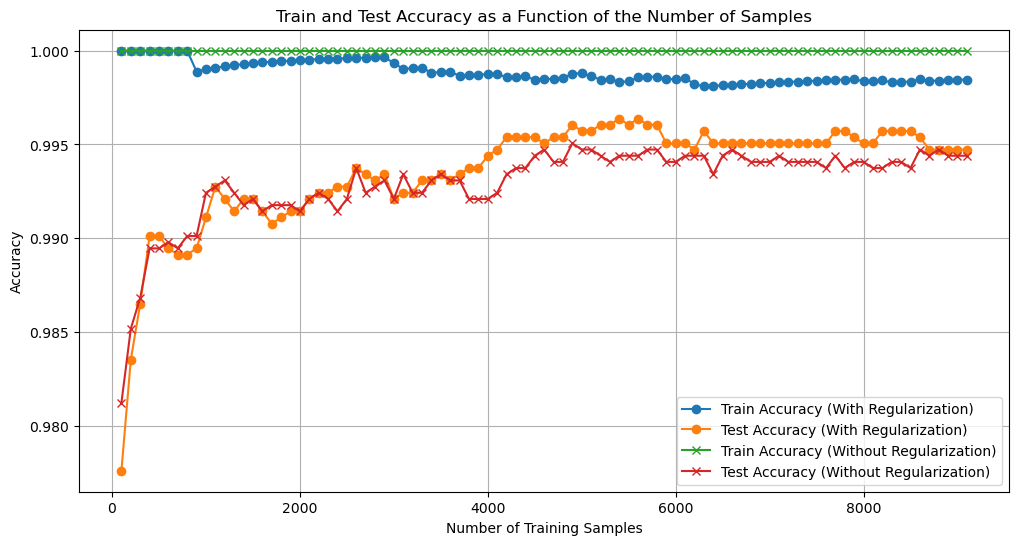

In [14]:
# Plot Train/Test Accuracy as a Function of the Number of Samples
num_samples = np.arange(100, len(X_train), 100)  # Number of samples from 100 to the size of X_train
train_accuracy_with_reg_samples = []
test_accuracy_with_reg_samples = []

train_accuracy_without_reg_samples = []
test_accuracy_without_reg_samples = []

# Train models on different sample sizes and record accuracy
for n_samples in num_samples:
    model_with_reg = LogisticRegression(penalty='l2', C=best_C_with_reg, max_iter=2000, solver='sag')
    model_without_reg = LogisticRegression(penalty=None, C=best_C_without_reg, max_iter=2000, solver='newton-cg')
    X_train_sampled = X_train[:n_samples]
    y_train_sampled = y_train[:n_samples]
    
    # Train model with regularization
    model_with_reg.fit(X_train_sampled, y_train_sampled)
    train_accuracy_with_reg_samples.append(accuracy_score(y_train_sampled, model_with_reg.predict(X_train_sampled)))
    test_accuracy_with_reg_samples.append(accuracy_score(y_test, model_with_reg.predict(X_test)))
    
    # Train model without regularization
    model_without_reg.fit(X_train_sampled, y_train_sampled)
    train_accuracy_without_reg_samples.append(accuracy_score(y_train_sampled, model_without_reg.predict(X_train_sampled)))
    test_accuracy_without_reg_samples.append(accuracy_score(y_test, model_without_reg.predict(X_test)))

# Plot accuracy vs. number of samples
plt.figure(figsize=(12, 6))
plt.plot(num_samples, train_accuracy_with_reg_samples, label='Train Accuracy (With Regularization)', marker='o')
plt.plot(num_samples, test_accuracy_with_reg_samples, label='Test Accuracy (With Regularization)', marker='o')
plt.plot(num_samples, train_accuracy_without_reg_samples, label='Train Accuracy (Without Regularization)', marker='x')
plt.plot(num_samples, test_accuracy_without_reg_samples, label='Test Accuracy (Without Regularization)', marker='x')

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy as a Function of the Number of Samples')
plt.legend()
plt.grid(True)
plt.show()